# Langmuir probe の測定データの解析

## 1. ${V_p, I_p}$ をプロットする

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

データのインポート

In [76]:
# V1
df1 = pd.read_csv('../../yun_data/0118/Scan/4cm_1.5V.csv', skiprows=9, usecols=[0,1,2], names=('Time', 'Signal1', 'Signal2'))
#df1 = pd.read_csv('../../yun_data/0118/test01.csv', skiprows=9, usecols=[0,1,2], names=('Time', 'Signal1', 'Signal2'))
t = df1['Time']
v1 = df1['Signal1']
v2 = df1['Signal2']

### ${I_p, V_p}$ の計算  
#### ${I_p = \frac{V_p}{R_1} }$, ${V_p = \frac{R_2+R_3}{R_2}V_2}$

In [77]:
r1 = 100 # 抵抗値 [Ω]
r2 = 1000 # 測定した方の抵抗 [Ω]
r3 = 1e6 # もう一個の抵抗[Ω]

vp = v2 * (r2 + r3) / r2
ip = v1 / r1

各周期分に分ける

In [78]:
t_cyc = t[0:100100]
t_lis = t_cyc.values.tolist()
ip_1 = ip[0:100100]
vp_1 = vp[0:100100]
ip_2 = ip[100100:200200]
vp_2 = vp[100100:200200]
ip_3 = ip[200200:300300]
vp_3 = vp[200200:300300]
ip_4 = ip[300300:400400]
vp_4 = vp[300300:400400]
ip_5 = ip[400400:500500]
vp_5 = vp[400400:500500]
ip_2.reset_index(inplace=True, drop=True)
vp_2.reset_index(inplace=True, drop=True)
ip_3.reset_index(inplace=True, drop=True)
vp_3.reset_index(inplace=True, drop=True)
ip_4.reset_index(inplace=True, drop=True)
vp_4.reset_index(inplace=True, drop=True)
ip_5.reset_index(inplace=True, drop=True)
vp_5.reset_index(inplace=True, drop=True)

1~5周期の平均をとる

In [79]:
cyc = np.arange(0,100100)
ip_ave = []
vp_ave = []

for i in cyc:
    ip_i = ( ip_1[i] + ip_2[i] + ip_3[i] + ip_4[i] + ip_5[i] ) / 5
    vp_i = ( vp_1[i] + vp_2[i] + vp_3[i] + vp_4[i] + vp_5[i] ) / 5
    ip_ave.append(ip_i)
    vp_ave.append(vp_i)

一定間隔ごとにデータを抽出

In [80]:
ext = np.arange(0,100100,500) # データを抽出する間隔
ip_e = []
vp_e = []
t_e = []
for i in ext:
    ei = ip_ave[i]
    ev = vp_ave[i]
    et = t_lis[i]
    ip_e.append(ei)
    vp_e.append(ev)
    t_e.append(et)

### ${I_p, V_p}$の時間変化

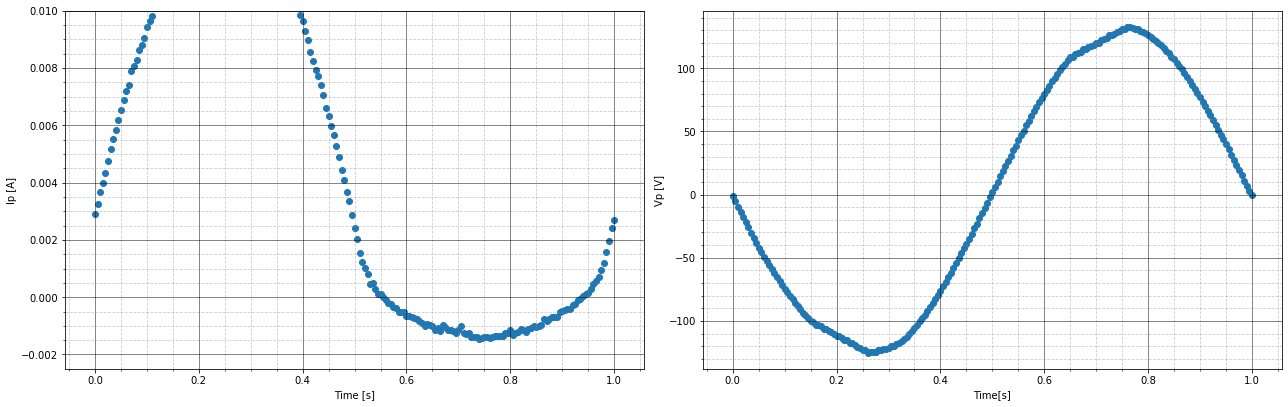

In [81]:
#font_setup(size=18)
fig = plt.figure()
fig.set_size_inches(18,6)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(t_e, ip_e)
ax2.scatter(t_e, vp_e)
ax1.set_xlabel('Time [s]')
ax2.set_xlabel('Time[s]')
ax1.set_ylabel('Ip [A]')
ax2.set_ylabel('Vp [V]')
ax1.set_ylim(-0.0025,0.01)
ax1.grid(b=True, which='major', color='black', linestyle='-', alpha=0.6)
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.4)
ax2.grid(b=True, which='major', color='black', linestyle='-', alpha=0.6)
ax2.minorticks_on()
ax2.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.4)
#fig.suptitle('Time change of Ip, Vp')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

### I-V プロット

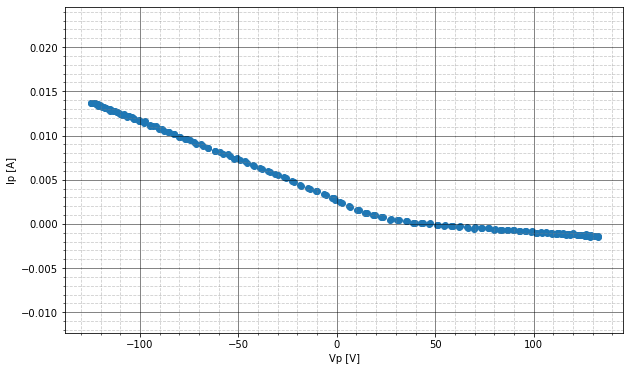

In [82]:
#font_setup(size=18)
fig = plt.figure()
fig.set_size_inches(10,6)
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(vp_e, ip_e)
ax1.set_xlabel('Vp [V]')
ax1.set_ylabel('Ip [A]')
#ax1.set_ylim(-0.002,0.002)
ax1.grid(b=True, which='major', color='black', linestyle='-', alpha=0.6)
plt.minorticks_on()
ax1.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.4)
#ax1.set_ylim(-0.7,0.7)
#plt.title('I-V plot, plasma current 1.5 A')
plt.show()

In [13]:
ip_e_0 = []
for i in range(len(ip_e)):
    ii = ip_e[i] + 0.005
    ip_e_0.append(ii)

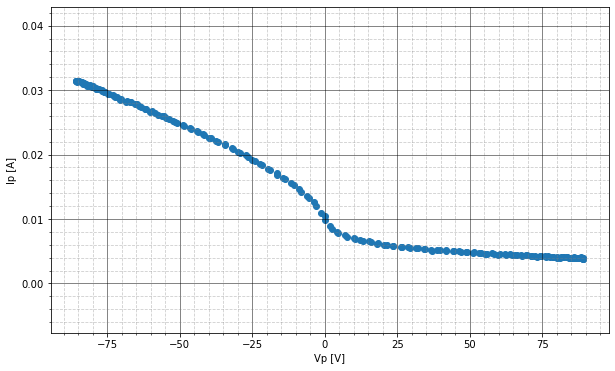

In [14]:
#font_setup(size=18)
fig = plt.figure()
fig.set_size_inches(10,6)
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(vp_e, ip_e_0)
ax1.set_xlabel('Vp [V]')
ax1.set_ylabel('Ip [A]')

ax1.grid(b=True, which='major', color='black', linestyle='-', alpha=0.6)
plt.minorticks_on()
ax1.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.4)
#ax1.set_ylim(-0.0005,0.0005)
#ax1.set_ylim(-0.7,0.7)
#plt.title('I-V plot, plasma current 1.5 A')
plt.show()

In [15]:
ln_ip = []
for i in range(len(ip_e_0)):
    ln_i = np.log(ip_e_0[i])
    ln_ip.append(ln_i)

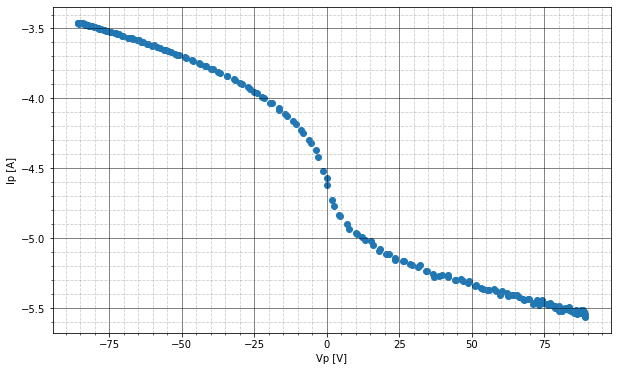

In [16]:
fig = plt.figure()
fig.set_size_inches(10,6)
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(vp_e, ln_ip)
ax1.set_xlabel('Vp [V]')
ax1.set_ylabel('Ip [A]')

ax1.grid(b=True, which='major', color='black', linestyle='-', alpha=0.6)
plt.minorticks_on()
ax1.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.4)
#ax1.set_ylim(-0.0005,0.0005)
#ax1.set_ylim(-0.7,0.7)
#plt.title('I-V plot, plasma current 1.5 A')
plt.show()